# Casos COVID-19 confirmados en Mexico 

**Core R y ggplot2**

Se realizara el analisis de los casos confirmados de Covid19 por estados de la Republica Mexicana.
La documentación utilizada proviene del portal del Gobierno de Mexico [aquí](https://coronavirus.gob.mx/datos/).

***Carga de informacion***

In [1]:
library(tidyverse)
library(lubridate)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.1     v dplyr   1.0.0
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [133]:
df<-read.csv("Casos_Diarios_Estado_Nacional_Confirmados_20200715.csv")

***Estructura de la informacion***

In [134]:
str(df)

'data.frame':	33 obs. of  189 variables:
 $ cve_ent    : int  1 2 3 4 7 8 9 5 6 10 ...
 $ poblacion  : int  1434635 3634868 804708 1000617 5730367 3801487 9018645 3218720 785153 1868996 ...
 $ nombre     : Factor w/ 33 levels "AGUASCALIENTES",..: 1 2 3 4 5 6 9 7 8 10 ...
 $ X12.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X13.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X14.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X15.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X16.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X17.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X18.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X19.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X20.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X21.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X22.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X23.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X24.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X25.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X26.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X27.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X28.0

In [13]:
str(covid_mex)

tibble [33 × 189] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ cve_ent   : chr [1:33] "01" "02" "03" "04" ...
 $ poblacion : num [1:33] 1434635 3634868 804708 1000617 5730367 ...
 $ nombre    : chr [1:33] "AGUASCALIENTES" "BAJA CALIFORNIA" "BAJA CALIFORNIA SUR" "CAMPECHE" ...
 $ 12-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 13-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 14-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 15-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 16-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 17-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 18-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 19-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 20-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 21-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 22-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 23-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 24-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 25-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 26-01-2020: num [1:33]

Pasamos la base a _long format_

In [135]:
df_long<-df %>%
    pivot_longer(cols=starts_with("X"),
                 names_to="fecha",
                 values_to="casos")

In [136]:
head(df_long)

cve_ent,poblacion,nombre,fecha,casos
1,1434635,AGUASCALIENTES,X12.01.2020,0
1,1434635,AGUASCALIENTES,X13.01.2020,0
1,1434635,AGUASCALIENTES,X14.01.2020,0
1,1434635,AGUASCALIENTES,X15.01.2020,0
1,1434635,AGUASCALIENTES,X16.01.2020,0
1,1434635,AGUASCALIENTES,X17.01.2020,0


Pasamos la columna de fecha a formato de fecha en R

In [137]:
df_long$fecha<- df_long$fecha %>%
                    str_remove("X") %>%
                    dmy()

In [138]:
df_long<-rename(df_long, estado=nombre)

In [139]:
str(df_long)

tibble [6,138 x 5] (S3: tbl_df/tbl/data.frame)
 $ cve_ent  : int [1:6138] 1 1 1 1 1 1 1 1 1 1 ...
 $ poblacion: int [1:6138] 1434635 1434635 1434635 1434635 1434635 1434635 1434635 1434635 1434635 1434635 ...
 $ estado   : Factor w/ 33 levels "AGUASCALIENTES",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ fecha    : Date[1:6138], format: "2020-01-12" "2020-01-13" ...
 $ casos    : int [1:6138] 0 0 0 0 0 0 0 0 0 0 ...


### **Análisis exploratorio**

Primero veremos el comportamiento a nivel nacional de la cantidad de confirmados

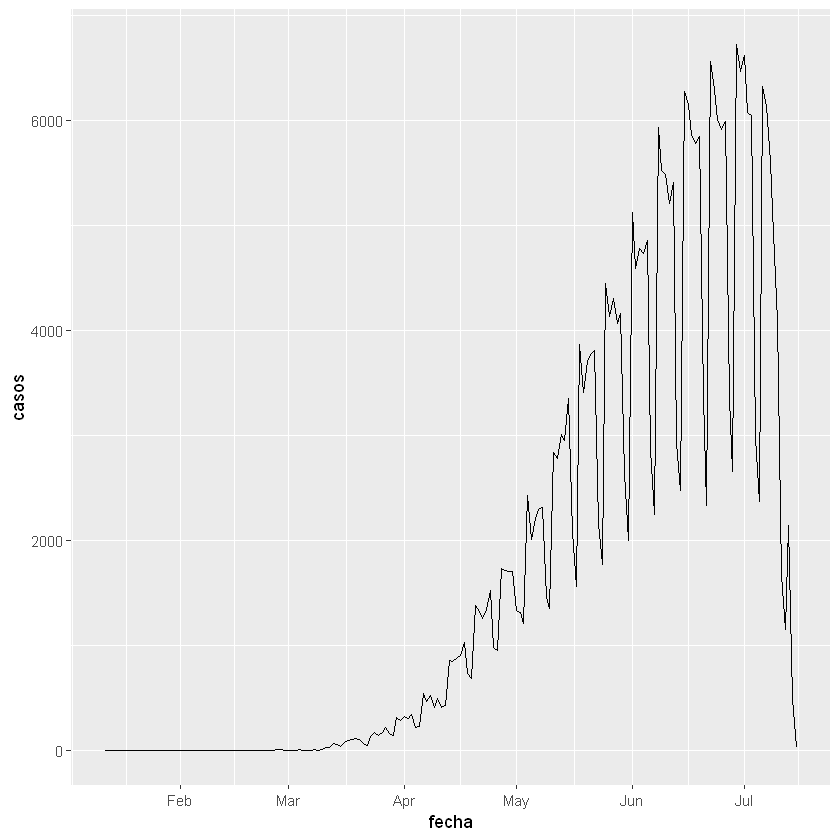

In [200]:
ggplot(subset(df_long,estado=='Nacional'), aes(x= fecha, y=casos)) +
    geom_line()     

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 46 rows containing non-finite values (stat_smooth)."

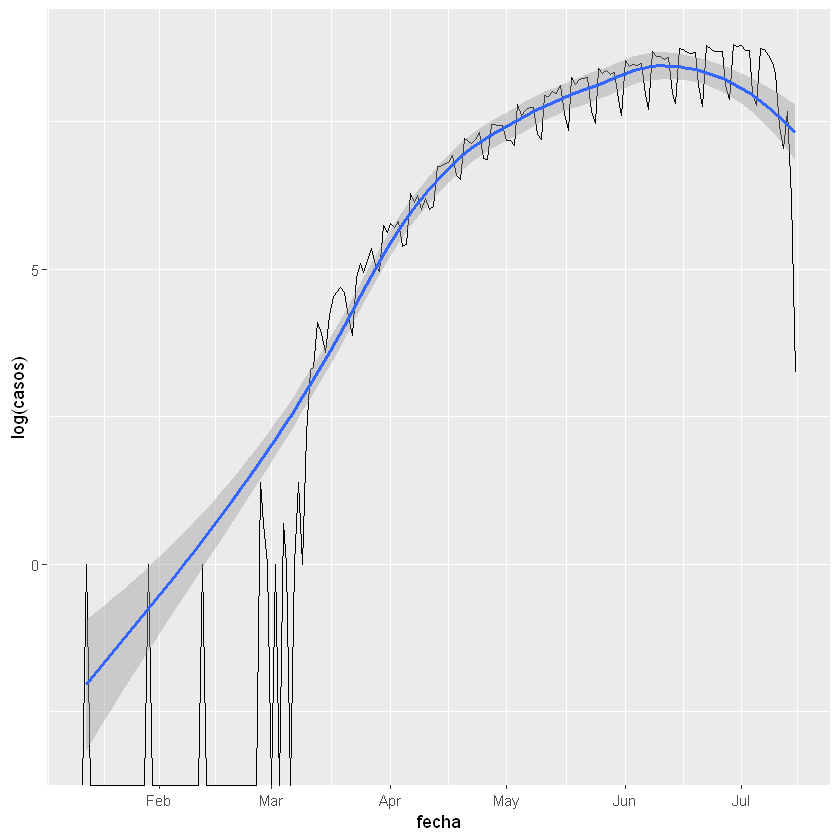

In [197]:
ggplot(subset(df_long,estado=='Nacional'), aes(x= fecha, y=log(casos))) +
    geom_line() + 
    geom_smooth()

Podemos observar que hay picos en la cantidad de casos, hay más casos entre semana y los fines de semana disminuyen. Esto puede deberse a un retraso administrativo en el reporte de casos durante el fin de semana por parte de la Secretaría de Salud. 
También podemos observar que parece haber una diminución de casos durante el mes de julio, pero esto también se debe a un retraso administrativo, en el reporte de casos confirmados. 

**Ahora, veremos el comportamiento de casos confirmados a nivel estatal**

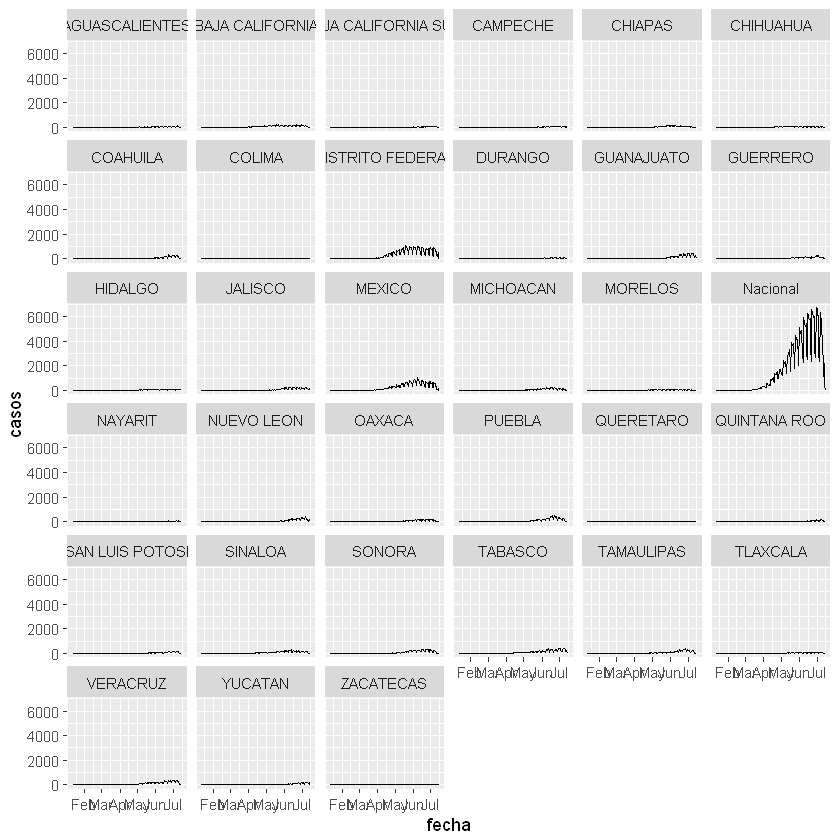

In [44]:
ggplot(data=df_long, aes(x= fecha, y=casos)) +
    geom_line() +
    facet_wrap(~estado)

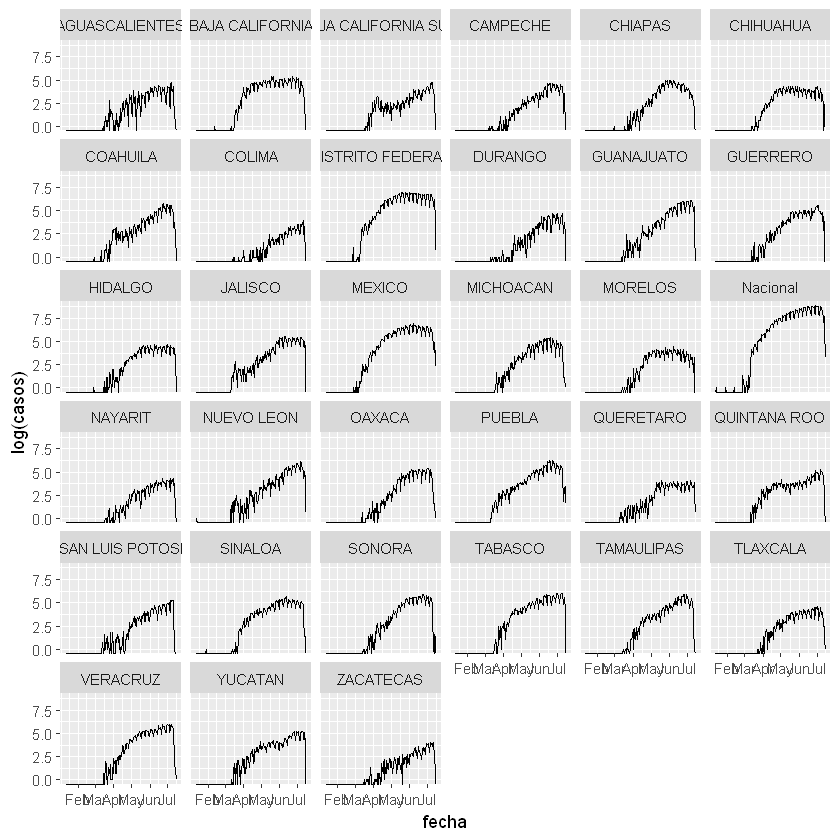

In [202]:
ggplot(data=df_long, aes(x= fecha, y=log(casos))) +
    geom_line() +
    facet_wrap(~estado)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 2240 rows containing non-finite values (stat_smooth)."

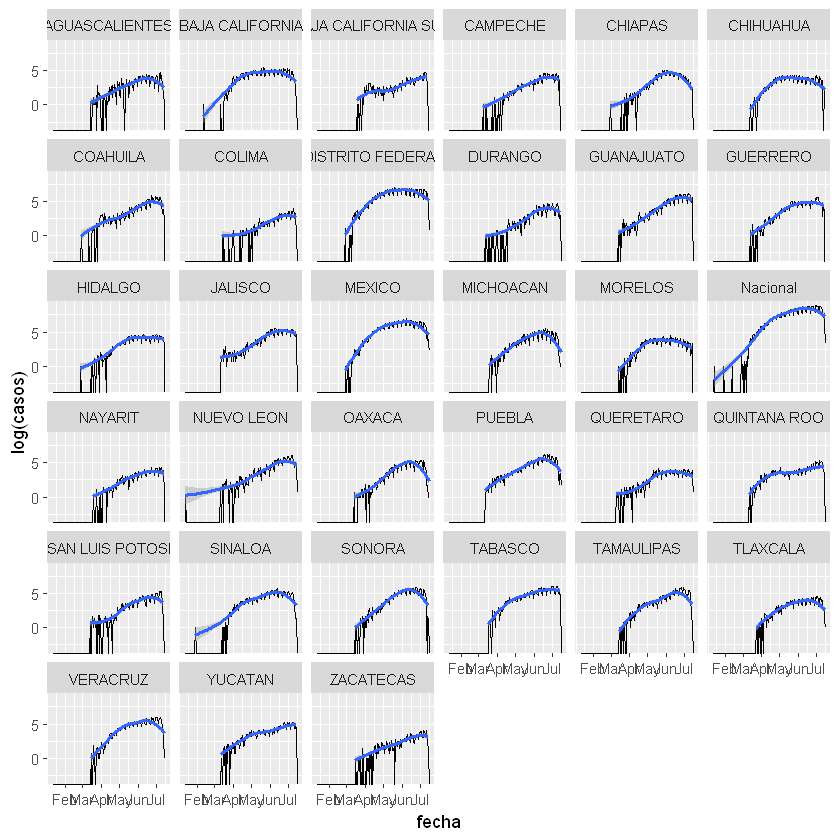

In [201]:
ggplot(data=df_long, aes(x= fecha, y=log(casos))) +
    geom_line() +
    geom_smooth() +
    facet_wrap(~estado)

In [180]:
df_long %>% 
        filter(estado==c("AGUASCALIENTES", "BAJA CALIFORNIA SUR", "CAMPECHE", "CHIAPAS", "CHIHUAHUA", "DISTRITO FEDERAL", "COAHUILA", 
                     "DURANGO", "GUANAJUATO", "JALISCO", "MICHOACAN", "QUERETARO", "QUINTANA ROO", "SAN LUIS POTOSI", "TAMAULIPAS", 
                     "VERACRUZ", "YUCATAN", "ZACATECAS"), .preserve=TRUE)

cve_ent,poblacion,estado,fecha,casos
1,1434635,AGUASCALIENTES,2020-01-12,0
1,1434635,AGUASCALIENTES,2020-01-30,0
1,1434635,AGUASCALIENTES,2020-02-17,0
1,1434635,AGUASCALIENTES,2020-03-06,0
1,1434635,AGUASCALIENTES,2020-03-24,0
1,1434635,AGUASCALIENTES,2020-04-11,1
1,1434635,AGUASCALIENTES,2020-04-29,18
1,1434635,AGUASCALIENTES,2020-05-17,7
1,1434635,AGUASCALIENTES,2020-06-04,44
1,1434635,AGUASCALIENTES,2020-06-22,68


Queremos saber el efecto que tendrá la reactivación de actividades en la cantidad de contagios. Por lo que solo vamos a seleccionar los estados que cambiaron a semáforo naranja a partir del 29 de junio de 2020.

In [184]:
df_long_n<-df_long %>% 
    filter(estado==c("AGUASCALIENTES", "BAJA CALIFORNIA SUR", "CAMPECHE", "CHIAPAS", "CHIHUAHUA", "DISTRITO FEDERAL", "COAHUILA", 
                     "DURANGO", "GUANAJUATO", "JALISCO", "MICHOACAN", "QUERETARO", "QUINTANA ROO", "SAN LUIS POTOSI", "TAMAULIPAS", 
                     "VERACRUZ", "YUCATAN", "ZACATECAS")) %>%
    mutate(semaforo=ifelse(fecha>=ymd(20200629), "naranja", "rojo"))

In [189]:
df_AGS<-df_long %>% filter(estado=="AGUASCALIENTES")
df_BCS<-df_long %>% filter(estado=="BAJA CALIFORNIA SUR")
df_CAM<-df_long %>% filter(estado=="CAMPECHE")
df_CHP<-df_long %>% filter(estado=="CHIAPAS")
df_CHI<-df_long %>% filter(estado=="CHIHUAHUA")
df_DF<-df_long %>% filter(estado=="DISTRITO FEDERAL")
df_COA<-df_long %>% filter(estado=="COAHUILA")
df_DUR<-df_long %>% filter(estado=="DURANGO")
df_GTO<-df_long %>% filter(estado=="GUANAJUATO")
df_JAL<-df_long %>% filter(estado=="JALISCO")
df_MCH<-df_long %>% filter(estado=="MICHOACAN")
df_QRO<-df_long %>% filter(estado=="QUERETARO")
df_QTN<-df_long %>% filter(estado=="QUINTANA ROO")
df_SLP<-df_long %>% filter(estado=="SAN LUIS POTOSI")
df_TAM<-df_long %>% filter(estado=="TAMAULIPAS")
df_VER<-df_long %>% filter(estado=="VERACRUZ")
df_YUC<-df_long %>% filter(estado=="YUCATAN")
df_ZAC<-df_long %>% filter(estado=="ZACATECAS")

In [191]:
df_long_sem<-bind_rows(df_AGS, df_BCS, df_CAM, df_CHP, df_CHI, df_DF, df_COA, df_DUR, df_GTO, df_JAL, df_MCH, df_QRO, df_QTN, df_SLP, df_TAM, df_VER, df_YUC, df_ZAC)

In [192]:
str(df_long_sem)

tibble [3,348 x 5] (S3: tbl_df/tbl/data.frame)
 $ cve_ent  : int [1:3348] 1 1 1 1 1 1 1 1 1 1 ...
 $ poblacion: int [1:3348] 1434635 1434635 1434635 1434635 1434635 1434635 1434635 1434635 1434635 1434635 ...
 $ estado   : Factor w/ 33 levels "AGUASCALIENTES",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ fecha    : Date[1:3348], format: "2020-01-12" "2020-01-13" ...
 $ casos    : int [1:3348] 0 0 0 0 0 0 0 0 0 0 ...


In [205]:
df_long_sem<-df_long_sem %>% 
                            mutate(semaforo=ifelse(fecha>=ymd(20200629), "naranja", "rojo"))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


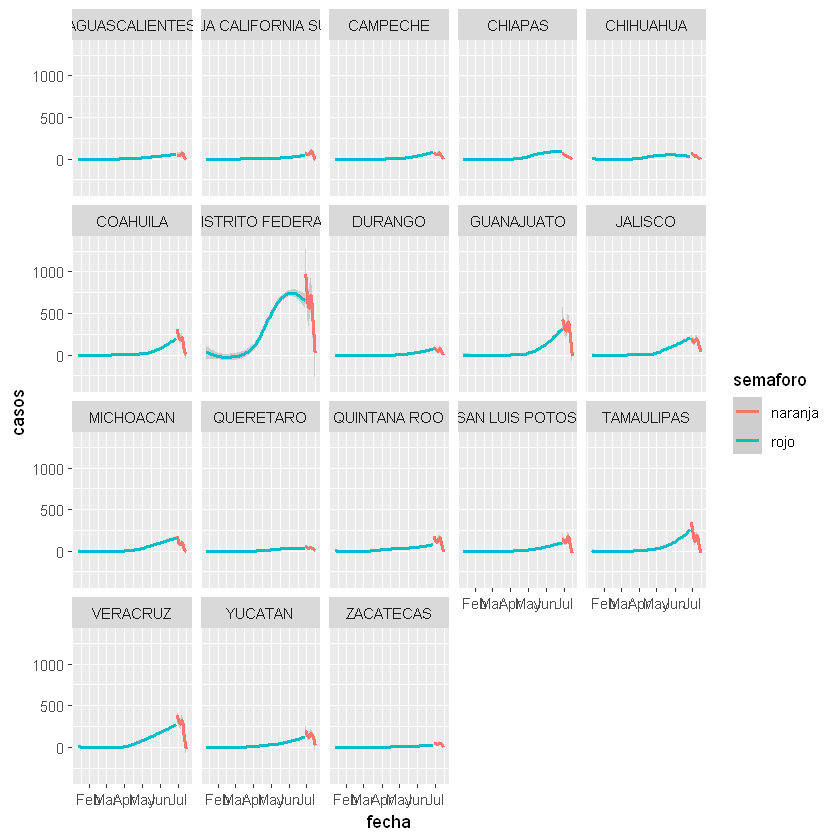

In [212]:
ggplot(data=df_long_sem, aes(x= fecha, y=casos, color=semaforo)) +
    geom_smooth() +
    facet_wrap(~estado)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 1232 rows containing non-finite values (stat_smooth)."

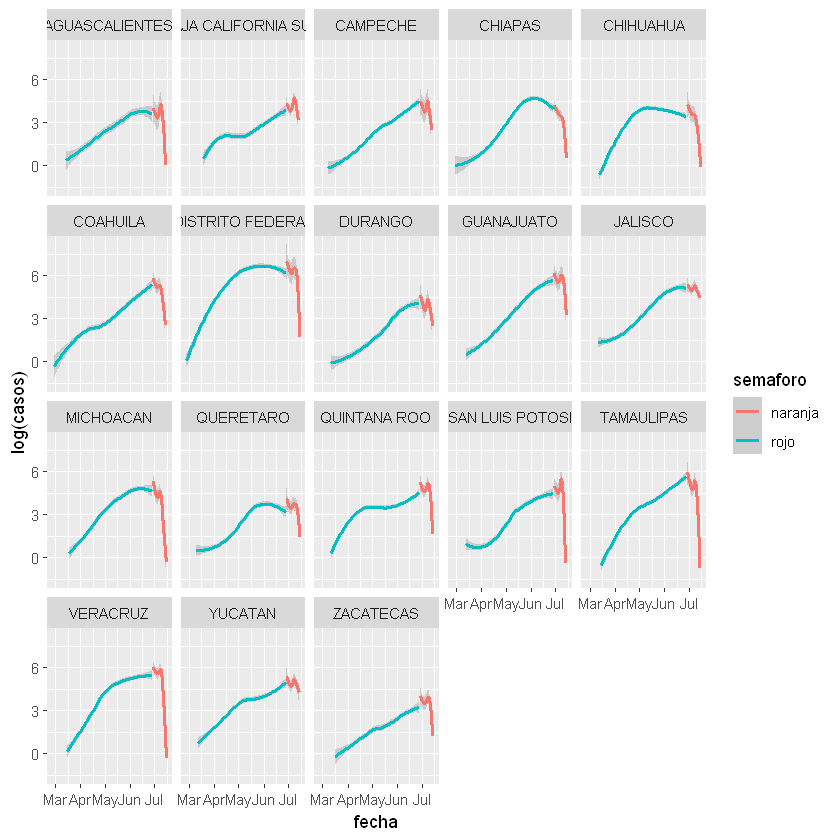

In [213]:
ggplot(data=df_long_sem, aes(x= fecha, y=log(casos), color=semaforo)) +
    geom_smooth() +
    facet_wrap(~estado)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 1232 rows containing non-finite values (stat_smooth)."

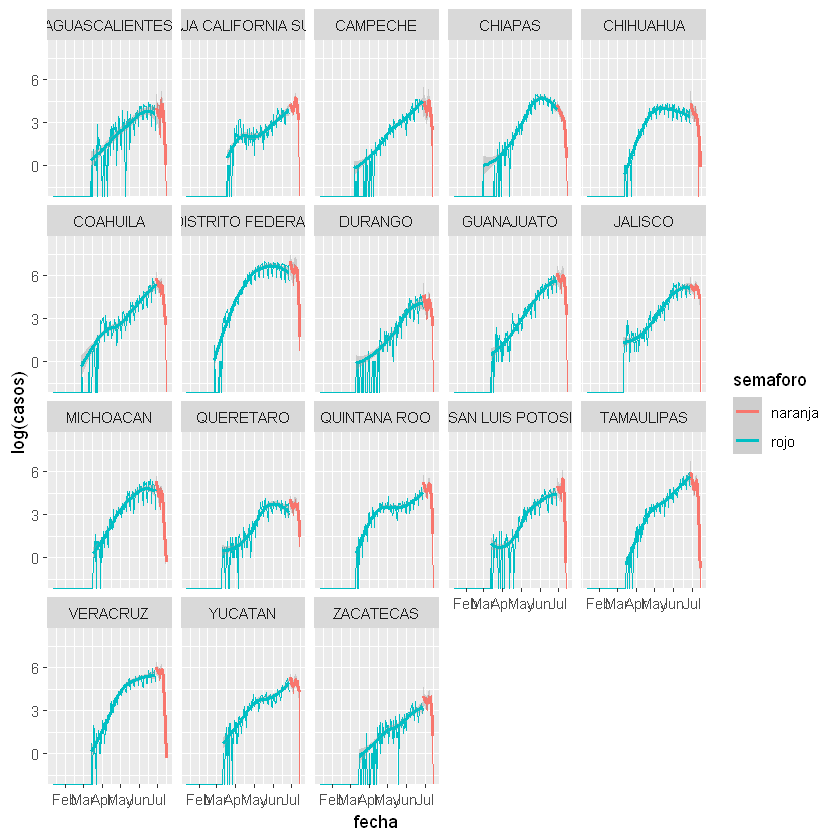

In [215]:
ggplot(data=df_long_sem, aes(x= fecha, y=log(casos), color=semaforo)) +
    geom_line() +
    geom_smooth() +
    facet_wrap(~estado)

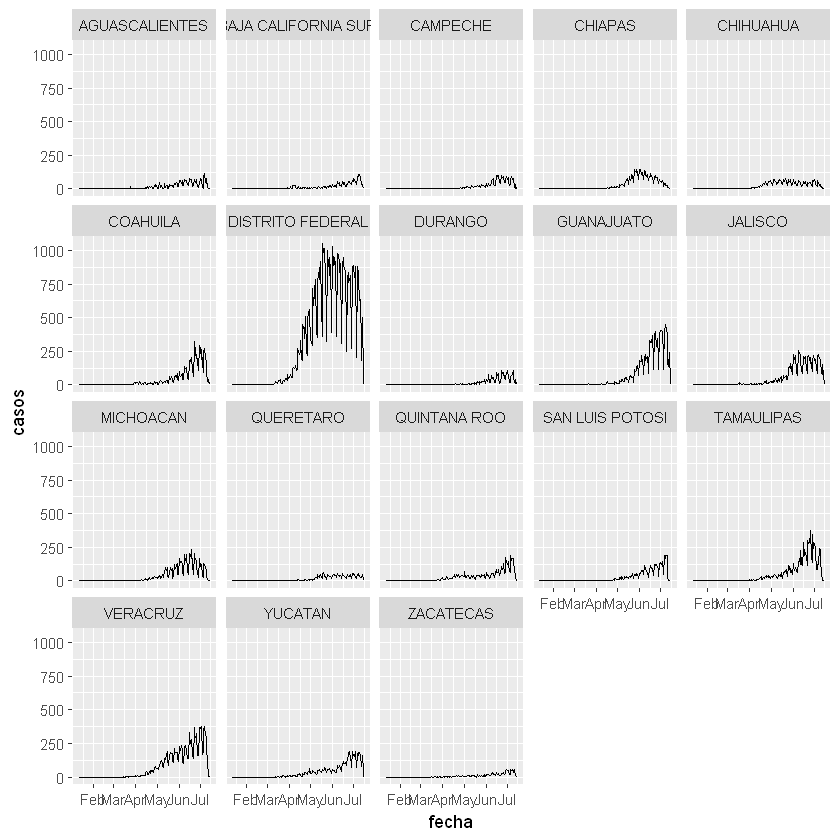

In [193]:
ggplot(data=df_long_sem, aes(x= fecha, y=casos)) +
    geom_line() +
    facet_wrap(~estado)

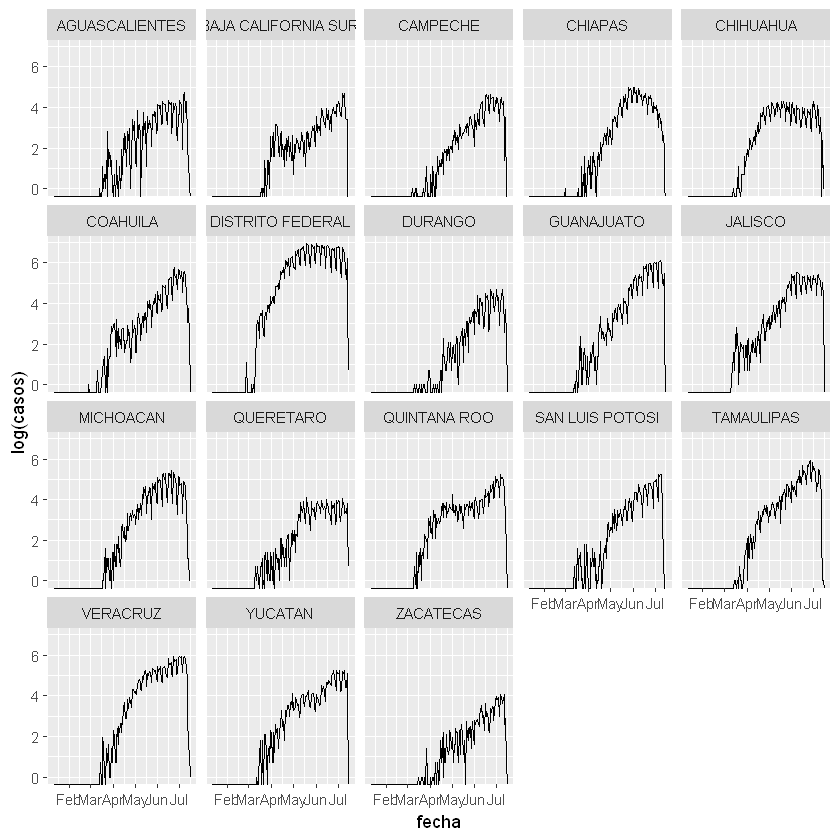

In [194]:
ggplot(data=df_long_sem, aes(x= fecha, y=log(casos))) +
    geom_line() +
    facet_wrap(~estado)

**Definicion de fechas de corte para evaluar la efectividad del confinamiento**

Se considera como fecha de inicio de confinamiento nacional el 30 de Mayo de 2020.

In [8]:
confinamiento<-"2020-03-30"

In [9]:
df_long$conf<-df_long$fecha<confinamiento
df_long$conf[df_long$conf==TRUE]<-'InicioPandemia'
df_long$conf[df_long$conf==FALSE]<-'Confinamiento'

Se separan las cifras totales para el analisis por estado

In [10]:
df_long_estados<-subset(df_long,estado!='Nacional')

Resultados de confirmados por etapa de confinamiento

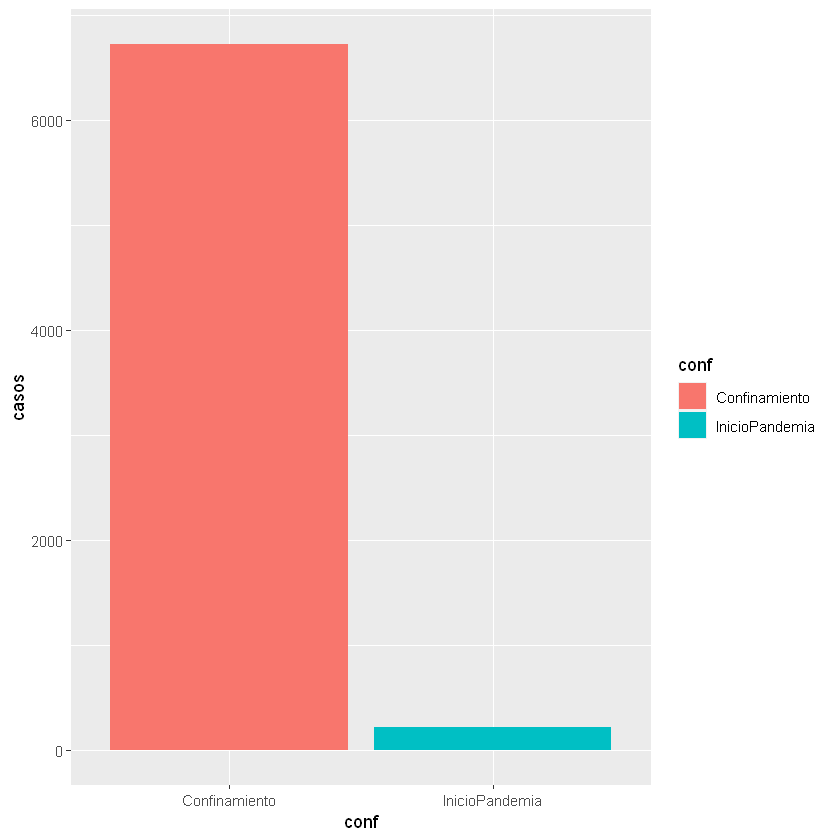

In [11]:
ggplot(subset(df_long,estado=='Nacional'),aes(fill=conf,y=casos,x=conf)) +
  geom_bar(position="dodge",stat="identity")

Se puede observar que existe un numero mayor de confirmados por covid-19 durante la etapa de confinamiento que durante el inicio de la pandemia.

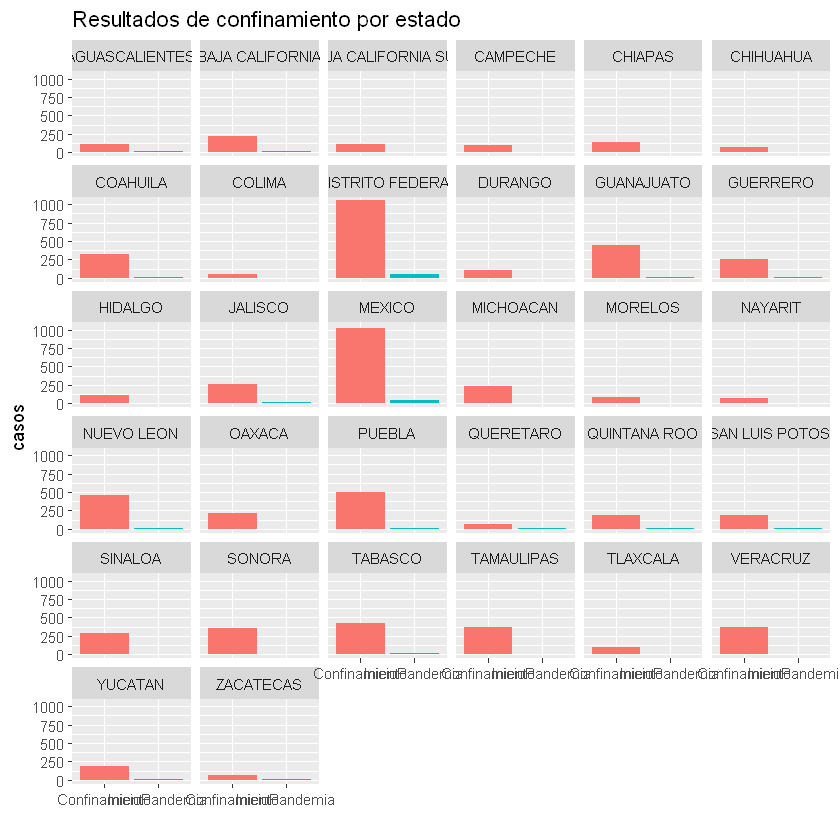

In [12]:
ggplot(df_long_estados,aes(fill=conf,y=casos,x=conf)) +
  geom_bar(position="dodge",stat="identity") +
  ggtitle("Resultados de confinamiento por estado") +
  facet_wrap(~estado)+
  theme(legend.position="none")+
  xlab("")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


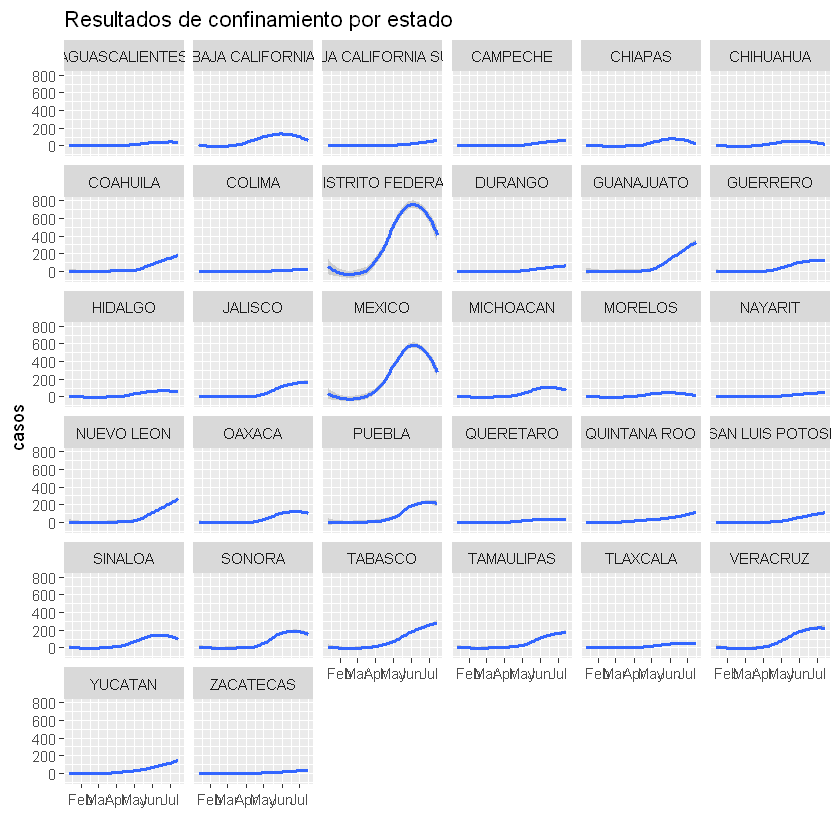

In [29]:
ggplot(df_long_estados,aes(y=casos,x=fecha)) +
  geom_smooth() +
  ggtitle("Resultados de confinamiento por estado") +
  facet_wrap(~estado)+
  theme(legend.position="none")+
  xlab("")

Los unicos estados que presentan una disminucion de casos respecto a los dos periodos son: Chihuahua, Baja California y Morelos; mientras que los 29 estados tinene aumento.

In [13]:
conf_est<-df_long_estados  %>%
  group_by(estado,conf) %>%
  summarise(casos=sum(casos,na.rm=TRUE))%>%
  spread(conf,casos)

`summarise()` regrouping output by 'estado' (override with `.groups` argument)


In [14]:
conf_est$delta<-conf_est$Confinamiento-conf_est$InicioPandemia

In [15]:
conf_est[order(conf_est$delta),]

estado,Confinamiento,InicioPandemia,delta
COLIMA,977,3,974
ZACATECAS,1506,10,1496
NAYARIT,2519,8,2511
BAJA CALIFORNIA SUR,2583,20,2563
QUERETARO,2635,32,2603
DURANGO,2915,9,2906
AGUASCALIENTES,3035,48,2987
CAMPECHE,3173,9,3164
MORELOS,3442,14,3428
TLAXCALA,3494,5,3489


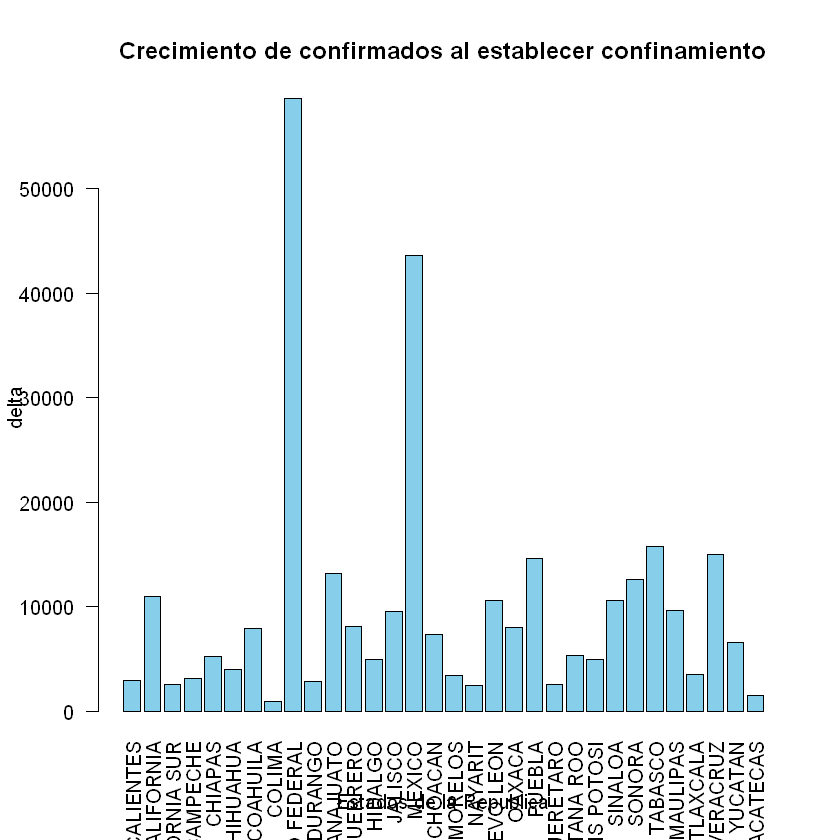

In [16]:
barplot(conf_est$delta,
        names=conf_est$estado,
        las=2,
        main='Crecimiento de confirmados al establecer confinamiento',
        xlab="Estados de la Republica",
        ylab="delta",
        col="skyblue")

In [17]:
conf_est_por<-df_long_estados  %>%
  group_by(estado) %>%
  summarise(casos=sum(casos,na.rm=TRUE),poblacion=max(poblacion))

`summarise()` ungrouping output (override with `.groups` argument)


In [18]:
conf_est_por$por<-100*conf_est_por$casos/conf_est_por$poblacion

In [19]:
plot_por<-ggplot(conf_est_por,aes(x=poblacion,y=por))+
  geom_point(size=6)

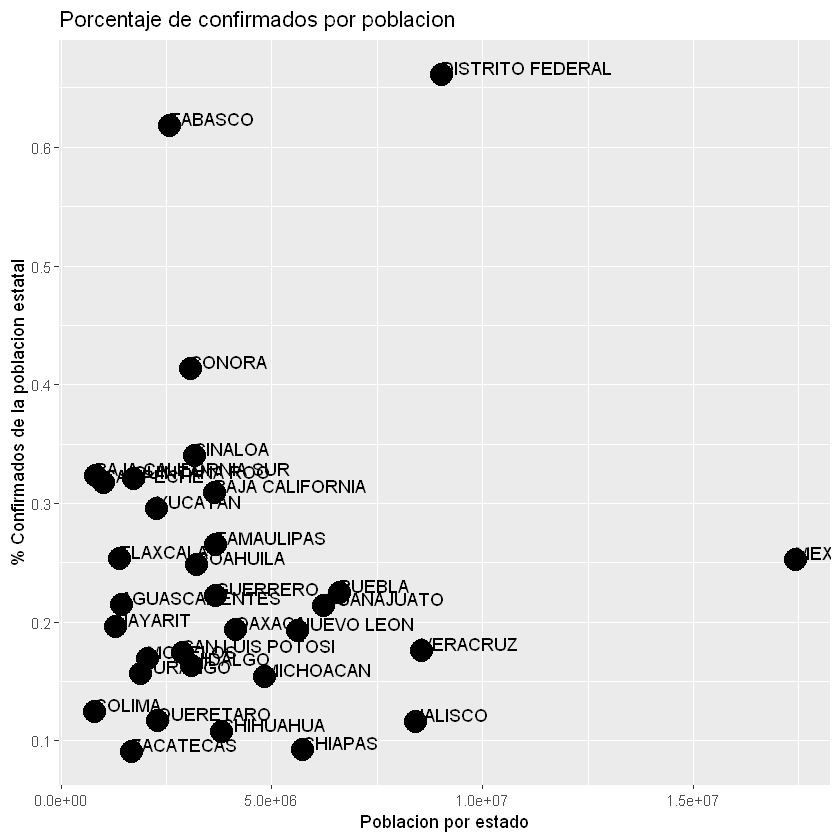

In [20]:
print(plot_por + labs( title= "Porcentaje de confirmados por poblacion", y="% Confirmados de la poblacion estatal", x = "Poblacion por estado")+geom_text(aes(label=estado),hjust=0,vjust=0))

Es importante hacer notar que al realizar los analisis en terminos relativos respecto a la poblacion total del estado, podemos notar que existen estados con porcentaje de casos confirmados alrededor entre 0.65 y 0.4% de su poblacion. Mientras que la inmensa mayoria se encuentra entre un 0.35% y 0.1%.

***Analisis de sensibilidad via regresion lineal***

In [21]:
acum_dia<-df_long_estados  %>%
  group_by(conf,fecha) %>%
  summarise(casos=sum(casos,na.rm=TRUE))

`summarise()` regrouping output by 'conf' (override with `.groups` argument)


`geom_smooth()` using formula 'y ~ x'


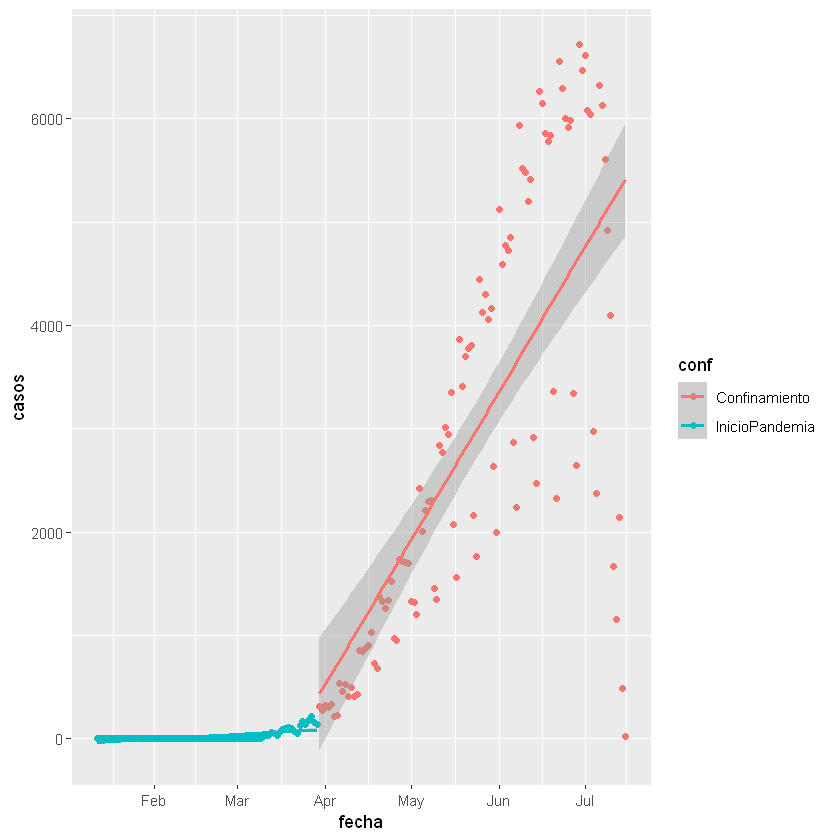

In [22]:
ggplot(acum_dia, aes(fecha,casos,group=conf,col=conf)) + 
  geom_point() + geom_smooth(method=lm)

Como lo mencionamos anteriormente, el periodo de confinamiento tienen mas casos totales que durante el inicio de la pandemia. No obstante, mediante el analisis de regresion simple se muestra que la pendiente de los dos modelos es diferente. Mientras que para la primera fase es positiva, para el segundo momento es menor y negativa. Lo que podria indicarnos que existe un cambio en la tendencia de confirmados por Covid-19. Es muy importante seguir monitoreando este desempeño para verificar que este comportamiento sea sostenido en el tiempo.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


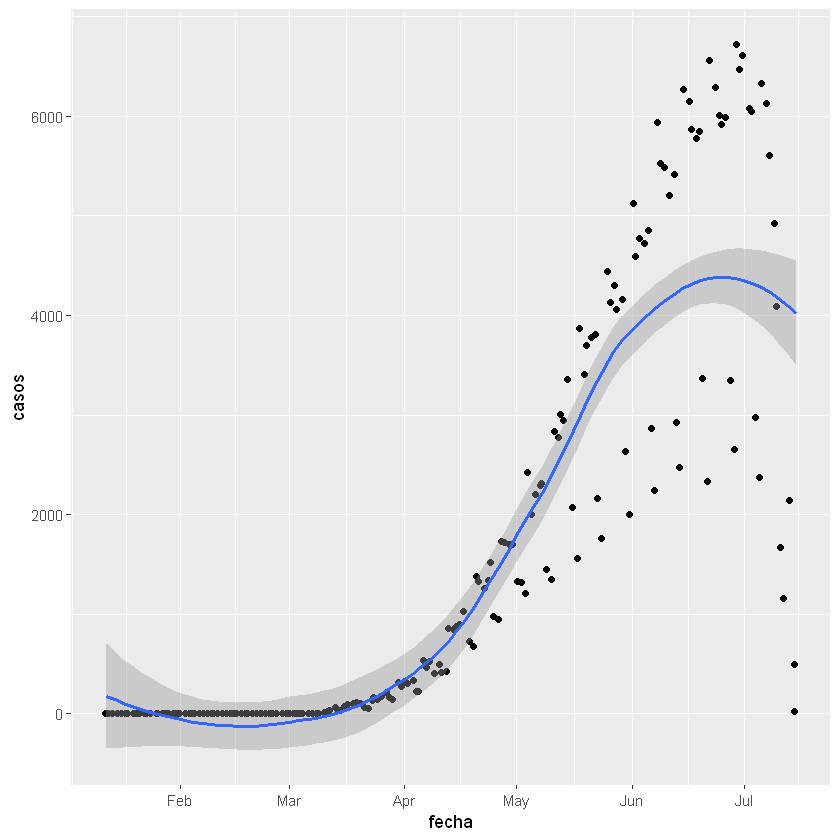

In [28]:
ggplot(acum_dia, aes(fecha,casos)) + 
  geom_point() + geom_smooth()